<a href="https://colab.research.google.com/github/RUMONMD89/Data-Science-with-Python/blob/main/ADS4REV_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Axes: xlabel='previous_outcome'>

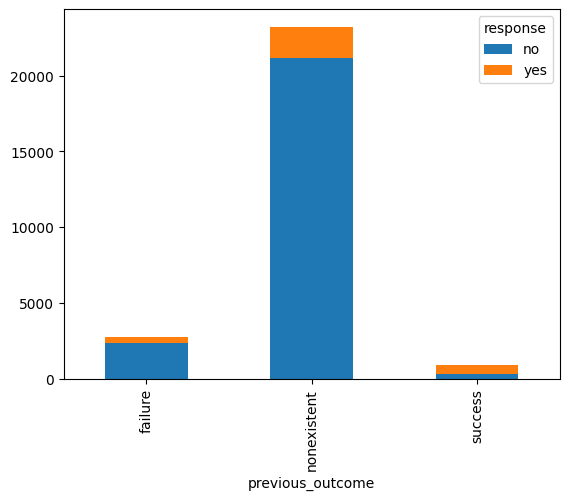

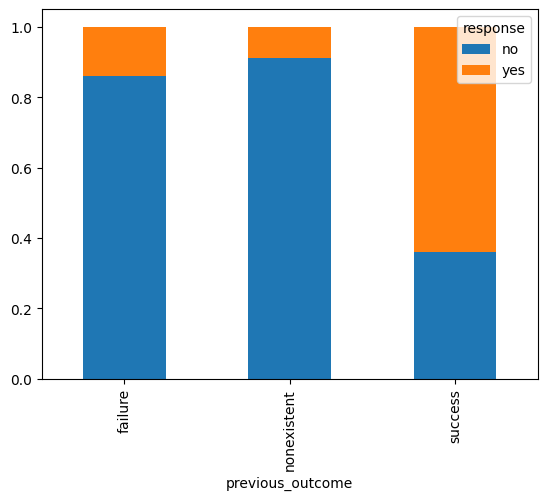

In [ ]:
# 4. 探索的データ解析
import pandas as pd
bank_train = pd.read_csv("bank_marketing_training.csv")
crosstab_01 = pd.crosstab(bank_train['previous_outcome'], bank_train['response'])
crosstab_01.plot(kind='bar', stacked=True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis=0)
crosstab_norm.plot(kind='bar', stacked=True)

In [ ]:
# 4･3･1 分割表の構築（Python）
crosstab_01 = pd.crosstab(bank_train['previous_outcome'], bank_train['previous'])
crosstab_02 = pd.crosstab(bank_train['response'], bank_train['previous_outcome'])
round(crosstab_02.div(crosstab_02.sum(0), axis=1) * 100, 1)

previous_outcome,failure,nonexistent,success
response,,,
no,86.1,91.2,36.0
yes,13.9,8.8,64.0


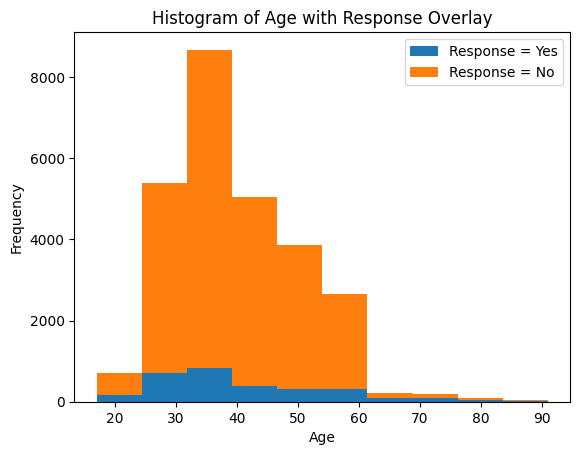

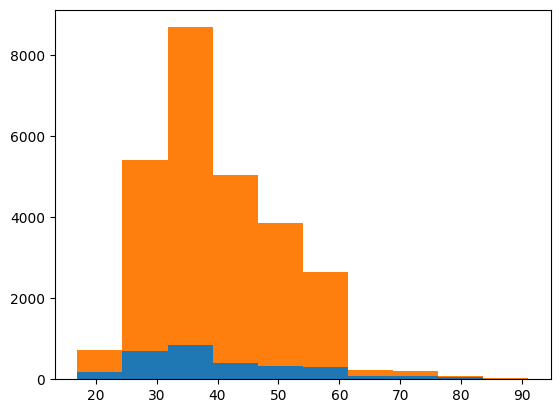

In [ ]:
# 4･4･1 複合ヒストグラムの構築（Python）
import numpy as np
import matplotlib.pyplot as plt
bt_age_y = bank_train[bank_train.response == 'yes']['age'].values
bt_age_n = bank_train[bank_train.response == 'no']['age'].values
plt.hist([bt_age_y, bt_age_n], bins=10, stacked=True)
plt.legend(['Response = Yes', 'Response = No'])
plt.title('Histogram of Age with Response Overlay')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

(n, bins, patches) = plt.hist([bt_age_y, bt_age_n], bins=10, stacked=True)

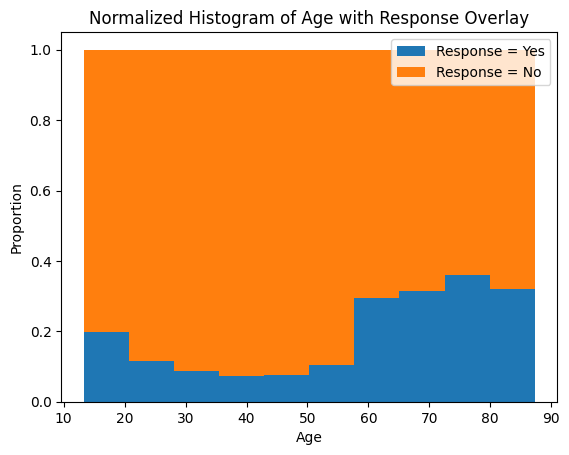

In [ ]:
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))
p1 = plt.bar(x=ourbins[:, 0], height=n_norm[:, 0], width=ourbins[:, 1] - ourbins[:, 0])
p2 = plt.bar(x=ourbins[:, 0], height=n_norm[:, 1], width=ourbins[:, 1] - ourbins[:, 0], bottom=n_norm[:, 0])
plt.legend(['Response = Yes', 'Response = No'])
plt.title('Normalized Histogram of Age with Response Overlay')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.show()

<Axes: title={'center': 'Bar Graph of Age (binned) with Response Overlay'}, xlabel='age_binned'>

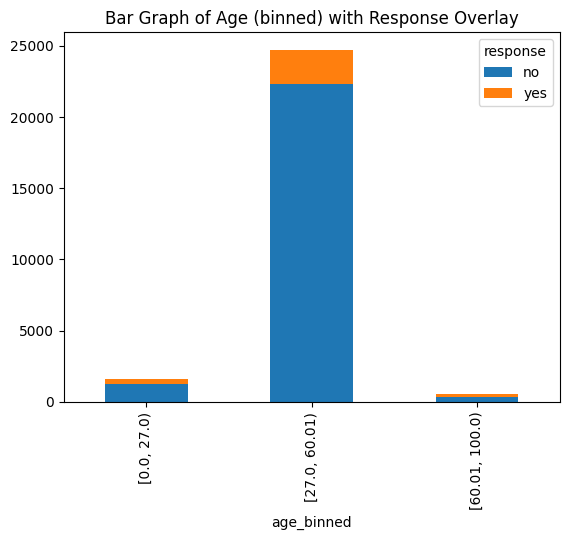

In [ ]:
# 4･5･1 説明変数のビン化
bank_train['age_binned'] = pd.cut(x=bank_train['age'], bins=[0, 27, 60.01, 100], right=False)
crosstab_02 = pd.crosstab(bank_train['age_binned'], bank_train['response'])
crosstab_02.plot(kind='bar', stacked=True, title='Bar Graph of Age (binned) with Response Overlay')

<Axes: xlabel='age_binned'>

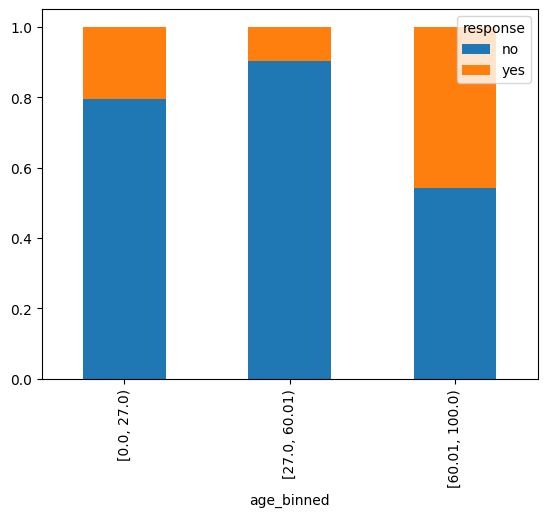

In [ ]:
crosstab_norm = crosstab_02.div(crosstab_02.sum(1), axis=0)
crosstab_norm.plot(kind='bar', stacked=True)